In [1]:
# binary outcome - True | False
likelihood = 0.3        # P(Intial|Outcome)
evidence = likelihood / (2*likelihood - 1)     # P(Outcome)

# P(Initial|Outcome) * P(Outcome) + P(Initial|~Outcome) * P(~Outcome) = P(Initial) = 1
# likelihood * evidence + (1 - likelihood) * (1 - evidence) = 1

prior = 0.7             # initial guess
likelihood, evidence

(0.3, -0.7499999999999999)

In [2]:
likelihood * evidence + (1 - likelihood) * (1 - evidence)

0.9999999999999999

```
Ax + (1-A)(1-x) = 1
Ax + 1 - A - (1-A)x = 1
A = (2A-1)x
x = A / (2A-1)

In 0 <= A < 0.5, x <= 0
In 0.5 < A <= 1, x >= 1
```
So a solution to `Ax + (1-A)(1-x) = 1` such that `0 <= x <= 1` doesn't seem to be possible - something must be wrong here!

In [22]:
import sympy
A, x = sympy.symbols('A'), sympy.symbols('x')
equation = A * x + (1-A) * (1-x) - 1
sympy.solve(equation, x)

[A/(2*A - 1)]

In [13]:
import random
from tqdm.auto import tqdm
tqdm.pandas()
outcomes = [0]
probabs = [prior]
#for _ in tqdm(range(100)):
for _ in range(10):
    out = random.getrandbits(1)       # random bit - 0 or 1
    # Bayes' Rule: P(Outcome|Initial) = P(Outcome) * P(Initial|Outcome) / P(Initial)
    if out == 1:
        posterior = evidence * likelihood / prior
    else:       # out = 0
        posterior = (1-evidence) * (1-likelihood) / prior
    print(f'{prior=}, {out=}, {posterior=}')
    prior = posterior
    outcomes.append(out)
    probabs.append(prior)

prior=0.033333333333333326, out=1, posterior=0.9000000000000001
prior=0.9000000000000001, out=1, posterior=0.033333333333333326
prior=0.033333333333333326, out=0, posterior=18.900000000000006
prior=18.900000000000006, out=1, posterior=0.0015873015873015869
prior=0.0015873015873015869, out=1, posterior=18.900000000000006
prior=18.900000000000006, out=0, posterior=0.033333333333333326
prior=0.033333333333333326, out=0, posterior=18.900000000000006
prior=18.900000000000006, out=0, posterior=0.033333333333333326
prior=0.033333333333333326, out=1, posterior=0.9000000000000001
prior=0.9000000000000001, out=0, posterior=0.7


In [15]:
prior = 0.033333333333333326
(1 - evidence) * (1 - likelihood) / prior

18.900000000000006

In [16]:
1 - evidence, 1 - likelihood

(0.9, 0.7)

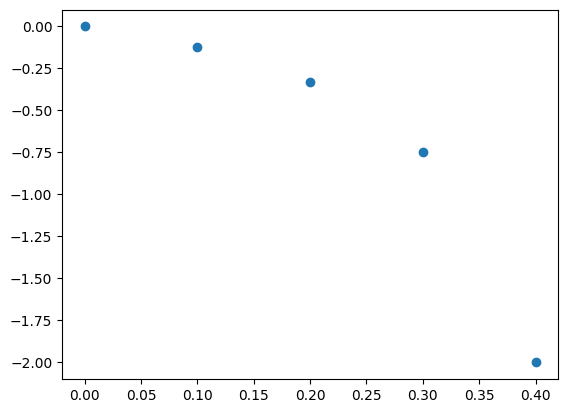

In [27]:
import matplotlib.pyplot as plt

f = lambda x: x / (2*x - 1)
#xs = [0.6, 0.7, 0.8, 0.9, 1]
xs = [0, 0.1, 0.2, 0.3, 0.4]
ys = [f(x) for x in xs]

plt.scatter(xs, ys)
plt.show()

In [24]:
ys

[3.0000000000000004, 1.7500000000000002, 1.3333333333333333, 1.125, 1.0]

In [ ]:
import matplotlib.pyplot as plt

indices = list(range(1, len(probabs) + 1))

# Define colors based on outcomes (0 -> red, 1 -> blue)
colors = ['red' if outcome == 0 else 'blue' for outcome in outcomes]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(indices, probabs, color=colors)
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.title('Prior-Posterior Loop')
plt.xticks(indices)
plt.show()

In [12]:
probabs

[0.7,
 0.04285714285714286,
 14.7,
 0.0020408163265306124,
 308.7,
 9.718172983479106e-05,
 6482.7,
 9.718172983479106e-05,
 6482.7,
 9.718172983479106e-05,
 308.7,
 0.0020408163265306124,
 14.699999999999998,
 0.0020408163265306124,
 14.699999999999998,
 0.0020408163265306124,
 14.699999999999998,
 0.0020408163265306124,
 308.7,
 0.0020408163265306124,
 308.7,
 0.0020408163265306124,
 308.7,
 9.718172983479106e-05,
 308.7,
 9.718172983479106e-05,
 6482.7,
 4.627701420704336e-06,
 6482.7,
 9.718172983479106e-05,
 6482.7,
 4.627701420704336e-06,
 6482.7,
 4.627701420704336e-06,
 6482.7,
 9.718172983479106e-05,
 6482.7,
 4.627701420704336e-06,
 6482.7,
 4.627701420704336e-06,
 136136.7,
 2.2036673431925407e-07,
 136136.7,
 4.627701420704336e-06,
 6482.7,
 4.627701420704336e-06,
 6482.7,
 9.718172983479106e-05,
 308.7,
 9.718172983479106e-05,
 6482.7,
 9.718172983479106e-05,
 6482.7,
 9.718172983479106e-05,
 6482.7,
 9.718172983479106e-05,
 6482.7,
 9.718172983479106e-05,
 308.7,
 9.71817